In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Datasets/train.csv', sep='|')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
trustLevel                   1879 non-null int64
totalScanTimeInSeconds       1879 non-null int64
grandTotal                   1879 non-null float64
lineItemVoids                1879 non-null int64
scansWithoutRegistration     1879 non-null int64
quantityModifications        1879 non-null int64
scannedLineItemsPerSecond    1879 non-null float64
valuePerSecond               1879 non-null float64
lineItemVoidsPerPosition     1879 non-null float64
fraud                        1879 non-null int64
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [7]:
train.describe()

trustLevel  totalScanTimeInSeconds   grandTotal  lineItemVoids  \
count  1879.000000             1879.000000  1879.000000    1879.000000   
mean      3.401809              932.153273    50.864492       5.469931   
std       1.709404              530.144640    28.940202       3.451169   
min       1.000000                2.000000     0.010000       0.000000   
25%       2.000000              474.500000    25.965000       2.000000   
50%       3.000000              932.000000    51.210000       5.000000   
75%       5.000000             1397.000000    77.285000       8.000000   
max       6.000000             1831.000000    99.960000      11.000000   

       scansWithoutRegistration  quantityModifications  \
count               1879.000000            1879.000000   
mean                   4.904204               2.525279   
std                    3.139697               1.695472   
min                    0.000000               0.000000   
25%                    2.000000               1.000000   
50%                    5.000000               3.000000   
75%                    8.000000               4.000000   
max                   10.000000               5.000000   

       scannedLineItemsPerSecond  valuePerSecond  lineItemVoidsPerPosition  \
count                1879.000000     1879.000000               1879.000000   
mean                    0.058138        0.201746                  0.745404   
std                     0.278512        1.242135                  1.327241   
min                     0.000548        0.000007                  0.000000   
25%                     0.008384        0.027787                  0.160000   
50%                     0.016317        0.054498                  0.350000   
75%                     0.032594        0.107313                  0.666667   
max                     6.666667       37.870000                 11.000000   

             fraud  
count  1879.000000  
mean      0.055349  
std       0.228720  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [12]:
def feature_vs_target(feature):
    g  = sns.factorplot(x=feature,y="fraud",data=train,kind="bar", size = 6 , palette = "muted")
    g.despine(left=True)
    g = g.set_ylabels("fraud probability")
    
def fdp_by_target(feature):
    g = sns.kdeplot(train[feature][(train["fraud"] == 0)], color="Red", shade = True)
    g = sns.kdeplot(train[feature][(train["fraud"] == 1)], ax =g, color="Blue", shade= True)
    g.set_xlabel(feature)
    g.set_ylabel("Frequency")
    g = g.legend(["Not Fraud","Fraud"])

def fdp_log_transform(feature):
    transformed = train[feature].map(lambda x: np.log(x) if x > 0 else 0)
    g = sns.distplot(transformed, color="m", label="Skewness : %.2f"%(transformed.skew()))
    g = g.legend(loc="best")

def skewness_feature(feature):
    g = sns.distplot(train[feature], color="m", label="Skewness : %.2f"%(train[feature].skew()))
    g = g.legend(loc="best")

def plot_feature_distribution(feature):
    g = sns.kdeplot(train[feature], color="Red", shade = True)
    
def plot_all_fpd(df):
    fig, ax = plt.subplots(3, 3, figsize=(18,4))
    columns = df.drop('fraud', 1).columns.tolist()
    for i in range(3):
        for j in range(3):
            feature = columns.pop()
            values = df[feature].values
            sns.distplot(values, ax=ax[i,j])
            ax[i,j].set_title(f'Distribution of {feature}', fontsize=14)
            #ax[i,j].set_xlim([min(values), max(values)])

In [9]:
#categoricas{trustLevel,  lineItemVoids, scansWithoutRegistration, quantityModifications}
#normais{totalScanTimeInSeconds, grandTotal}
#enviesadas{scannedLineItemsPerSecond 	valuePerSecond 	lineItemVoidsPerPosition}

There are 5.534858967535923% target values with 1


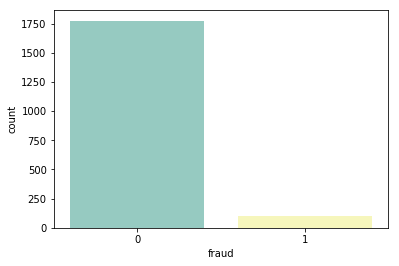

In [13]:
sns.countplot(train['fraud'], palette='Set3')
print("There are {}% target values with 1".format(100 * train["fraud"].value_counts()[1]/train.shape[0]))

### Features "Categóricas" com preservação da ordem

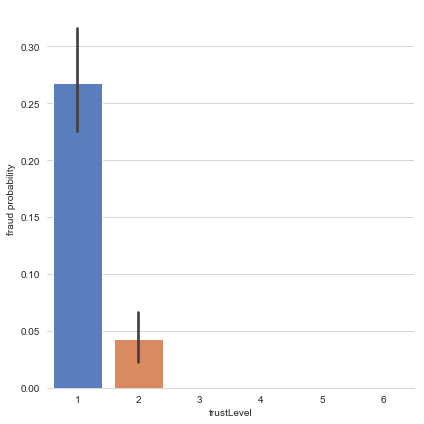

In [22]:
feature_vs_target('trustLevel')

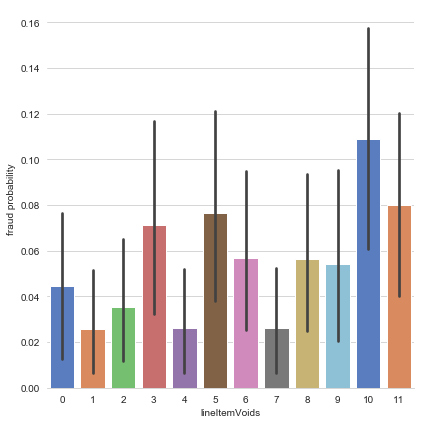

In [23]:
feature_vs_target('lineItemVoids')

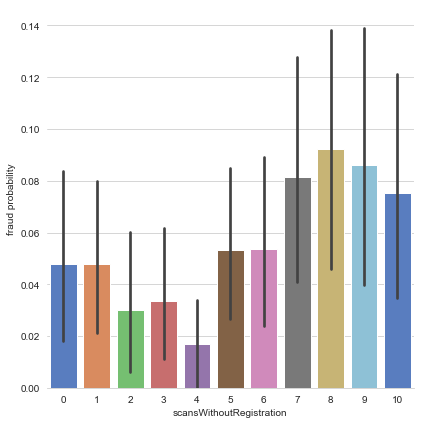

In [24]:
feature_vs_target('scansWithoutRegistration')

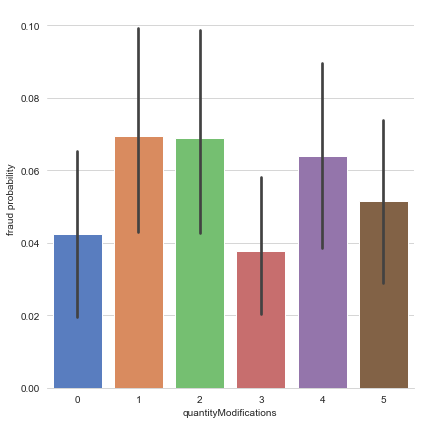

In [25]:
feature_vs_target('quantityModifications')

### Features com distribuição normal

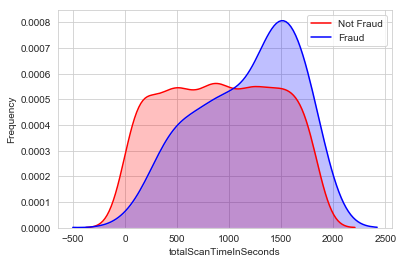

In [32]:
fdp_by_target('totalScanTimeInSeconds')

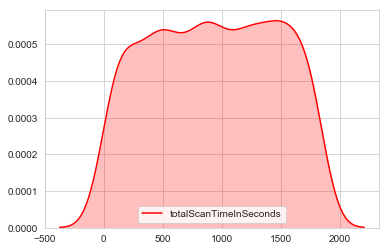

In [40]:
plot_feature_distribution('totalScanTimeInSeconds')

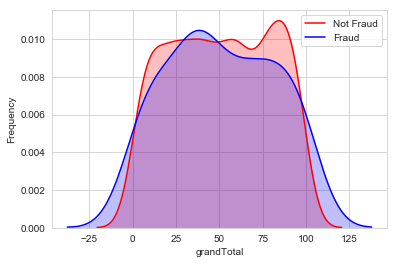

In [36]:
fdp_by_target('grandTotal')

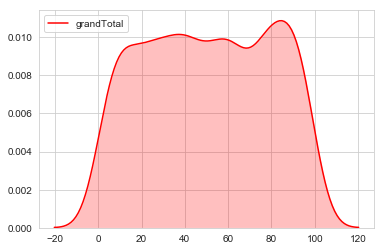

In [37]:
plot_feature_distribution('grandTotal')

### Features enviesadas
- Aplicar transformação com log para evitar overweight

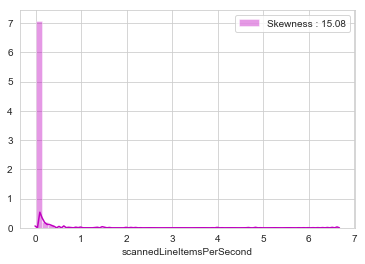

In [45]:
#scannedLineItemsPerSecond 	valuePerSecond 	lineItemVoidsPerPosition
skewness_feature('scannedLineItemsPerSecond')

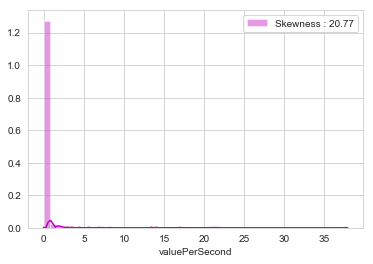

In [46]:
skewness_feature('valuePerSecond')

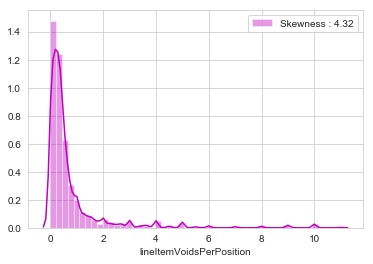

In [47]:
skewness_feature('lineItemVoidsPerPosition')

### Transformação com log

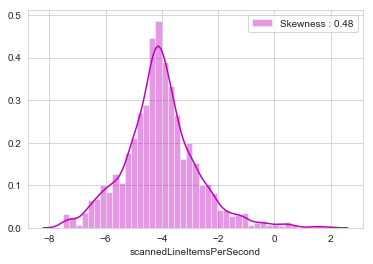

In [50]:
fdp_log_transform('scannedLineItemsPerSecond')

In [51]:
fdp_log_transform('valuePerSecond')

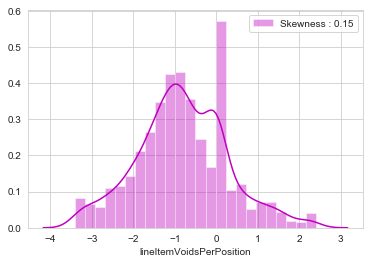

In [52]:
fdp_log_transform('lineItemVoidsPerPosition')